In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

df = pd.read_csv(r'data/Cooffending_data.csv')


In [25]:
nums = df.loc[:,"NoUnique"]
people = set(nums)
print(len(df),len(people))
df.head()

1280459 539593


,NoUnique,Name,Naissance,SEXE,SeqE,dateInf,NCD1,NCD2,NCD3,NCD4,MUN,ED1,Jeunes,Adultes,Date,annee
0,1,Tatielly,1007,F,1085034,20051217,3530,,,,58227,2,0,1,12/17/2005,2005
1,2,Oluwasayo,1828,F,1431379,20080423,1430,,,,94068,5,0,1,04/23/2008,2008
2,4,ناصرعلي محمد,1889,M,167174,20080306,1430,21702,,,49058,2,0,1,03/06/2008,2008
3,5,炜杰,1892,M,1179096,20080821,1420,,,,65005,71,0,1,08/21/2008,2008
4,17,Avare,1897,M,1270690,20030430,1625,,,,23027,,0,3,04/30/2003,2003


In [26]:
incidents = df["SeqE"]
incidents.head()

0    1085034
1    1431379
2     167174
3    1179096
4    1270690
Name: SeqE, dtype: int64

In [27]:
incidentSet = incidents
print(len(set(incidentSet)))


1164836


In [28]:
Allpeople = df["NoUnique"]
peoples = set(Allpeople)
len(peoples)

539593

In [29]:
dates = df["annee"]
dates.head()

0    2005
1    2008
2    2008
3    2008
4    2003
Name: annee, dtype: int64

In [30]:
total = 0 
for i in dates:
    if i >=2003 and i <=2010:
        total+= 1
total

1280459

In [31]:
network = df["SeqE"]
event = network.value_counts().nlargest(10).to_frame()
event

,count
SeqE,
27849,156
876159,102
445040,77
60815,60
23526,60
212285,57
754187,56
539385,52
23610,51


In [32]:
events = []
for i in event.index:
    events.append(i)
print(events
)

[27849, 876159, 445040, 60815, 23526, 212285, 754187, 539385, 23610, 453024]


In [33]:
## how to get two columns from pandas dataframe
## https://stackoverflow.com/questions/17071871/how-to-select-rows-from-a-dataframe-based-on-column-values



In [34]:
df2 = df.loc[df['SeqE'].isin([27849, 876159, 445040, 60815, 23526, 212285, 754187, 539385, 23610, 453024]
)]
df2 = df2.loc[:,["SeqE","MUN"]]

seen = {}
for index, row in df2.iterrows():
    print(row)
    if row['SeqE'] not in seen:
        seen[row['SeqE']] = row['MUN']

seen


SeqE    754187
MUN      95032
Name: 6929, dtype: int64
SeqE    23526
MUN     75017
Name: 12821, dtype: int64
SeqE    60815
MUN     54048
Name: 16388, dtype: int64
SeqE    212285
MUN      37067
Name: 17572, dtype: int64
SeqE    212285
MUN      37067
Name: 17838, dtype: int64
SeqE    60815
MUN     54048
Name: 18333, dtype: int64
SeqE    60815
MUN     54048
Name: 20034, dtype: int64
SeqE    23610
MUN     78005
Name: 24205, dtype: int64
SeqE    23610
MUN     78005
Name: 25087, dtype: int64
SeqE    754187
MUN      95032
Name: 26001, dtype: int64
SeqE    23526
MUN     75017
Name: 27836, dtype: int64
SeqE    23610
MUN     78005
Name: 28803, dtype: int64
SeqE    23526
MUN     75017
Name: 37836, dtype: int64
SeqE    754187
MUN      95032
Name: 37928, dtype: int64
SeqE    23610
MUN     78005
Name: 38286, dtype: int64
SeqE    212285
MUN      37067
Name: 40940, dtype: int64
SeqE    23610
MUN     78005
Name: 41611, dtype: int64
SeqE    23610
MUN     78005
Name: 42151, dtype: int64
SeqE    27849
MUN

{754187: 95032,
 23526: 75017,
 60815: 54048,
 212285: 37067,
 23610: 78005,
 27849: 66023,
 876159: 12072,
 453024: 66023,
 539385: 66023,
 445040: 66023}

In [35]:
print(df2)

           SeqE    MUN
6929     754187  95032
12821     23526  75017
16388     60815  54048
17572    212285  37067
17838    212285  37067
...         ...    ...
1191365  445040  66023
1195075  445040  66023
1200280  453024  66023
1214235  453024  66023
1219505  453024  66023

[717 rows x 2 columns]


## Graph


In [36]:
df = pd.read_csv(r'data/Cooffending_data.csv')

In [37]:
class Graph:
    def __init__(self):
        self.nodes = set()
        self.edges = defaultdict(set)
        self.distances = {}
        self.edgeDict = defaultdict(set)
    def add_node(self, value):
        self.nodes.add(value)

    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].add(to_node)
        self.edges[to_node].add(from_node)
        self.distances[(from_node, to_node)] = distance
        self.distances[(to_node, from_node)] = distance
    def set_all_unvisited(self):
        for node in self.nodes:
            node.set_unvisited()
class Nodes:
    def __init__(self, value):
        self.value = value
        self.edges = set()
        self.visited = False
        self.city = []

    def add_edge(self, node):
        self.edges.add(node)

    def get_edges(self):
        return self.edges

    def get_value(self):
        return self.value

    def set_visited(self):
        self.visited = True

    def set_unvisited(self):
        self.visited = False

    def get_visited(self):
        return self.visited

    def __str__(self):
        return str(self.value)

    def __repr__(self):
        return str(self.value)

    def __eq__(self, other):
        return self.value == other.value

    def __hash__(self):
        return hash(self.value)
    

In [38]:
## iterate through each row in dataframe and construct an adjacency list
def construct_adjacency_list_from_dataframe(df):
    adjacency_list = defaultdict(set)
    for index, row in df.iterrows():
        adjacency_list[row['SeqE']].add(Nodes(row['NoUnique']))

    return adjacency_list

In [39]:
## Construct an adjacency list from a dictionary where the every value of the dictionary is a list of nodes and the key does not matter
def construct_adjacency_list(dictionary):
    adjacency_list = defaultdict(set)
    for key in dictionary:
        for node1 in dictionary[key]:
            for node2 in dictionary[key]:
                if node1 != node2:
                        adjacency_list[node1].add(node2)
                        adjacency_list[node2].add(node1)

    return adjacency_list
        

In [40]:
a = construct_adjacency_list_from_dataframe(df)


### Properties

In [41]:
allpeople = set()
for k,v in a.items():
    for i in v:
        allpeople.add(i)
len(allpeople)

539593

In [42]:
multiedge = {}
for k,v in a.items():
    if len(v) > 1:
        multiedge[k]= v
len(multiedge)


84038

In [43]:
allpeople2 = set()
for k,v in multiedge.items():
    for i in v:
        allpeople2.add(i)
len(allpeople2)

121159

### Graph Construction

In [44]:
adj = construct_adjacency_list(a)
adj[Nodes(17)]

{583103, 592054}

In [45]:
## From an adjacency list, construct a graph
def construct_graph(adjacency_list):
    graph = Graph()
    for node in adjacency_list:
        graph.add_node(node)
        for node2 in adjacency_list[node]:
            graph.add_edge(node, node2, 1)
            node2.add_edge(node)
            node.add_edge(node2)
    return graph

In [46]:
## From a graph find all connected components and return a list of sets
def find_connected_components(graph):   
    graph.set_all_unvisited() 
    connected_components = []
    for node in graph.nodes:
        if not node.get_visited():
            connected_components.append(bfs(graph, node))
    return connected_components

## Breadth first search
def bfs(graph, start):
    queue = [start]
    connected_component = set()
    while queue:
        vertex = queue.pop(0)
        if not vertex.get_visited():
            vertex.set_visited()
            connected_component.add(vertex)
            for neighbour in graph.edges[vertex]:
                queue.append(neighbour)
    return connected_component


In [47]:
G= construct_graph(adj)


In [48]:

components = find_connected_components(G)
## find the largest connected component
largest_component = max(components, key=len)

len(largest_component)

19924

In [49]:
## create a subgraph of G with only the nodes in the largest connected component
def create_subgraph(graph, largest_component):
    subgraph = Graph()
    for node in largest_component:
        subgraph.add_node(node)
        for edge in graph.edges[node]:
            subgraph.add_edge(node, edge, 1)
    return subgraph

In [50]:
subG = create_subgraph(G, largest_component)

In [51]:
len(subG.nodes)

19924

In [52]:
len(G.nodes)

121159

In [53]:
total = 0
for i in G.edges:
    total += len(G.edges[i])
total/2

178413.0

In [54]:
maxEdge = max([len(G.edges[node]) for node in G.nodes])
maxEdge

227

In [55]:
# plot the degree distribution of a graph G using a log scale for the x axis
def plot_degree_distribution(G):
    degrees = [len(G.edges[node]) for node in G.nodes]
    plt.hist(degrees, log=True,bins=50)
    plt.title("Degree Distribution")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    plt.show()


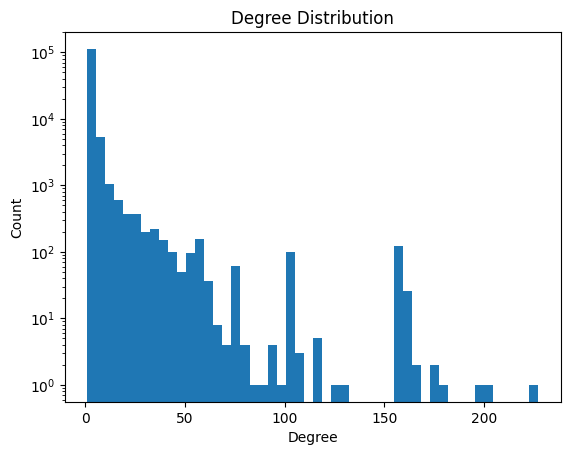

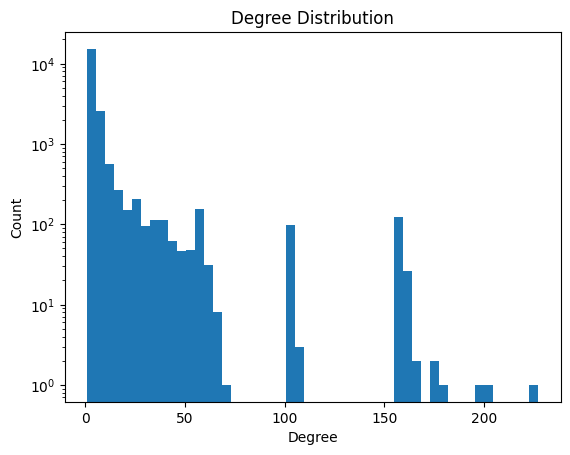

In [56]:
plot_degree_distribution(G)
plot_degree_distribution(subG)

In [57]:
## given a graph calculate edge density and average degree of the graph
def calculate_edge_density_and_average_degree(graph):
    total = 0
    for node in graph.nodes:
        total += len(graph.edges[node])
    total = total/2
    edge_density = total/(len(graph.nodes)*(len(graph.nodes)-1)/2)
    average_degree = total/len(graph.nodes)
    return edge_density, average_degree

In [58]:

def calculate_edge_density(graph):
    total = 0
    for node in graph.nodes:
        total += len(graph.edges[node])
    return total/(len(graph.nodes)*(len(graph.nodes)-1))


In [59]:
gDensity = calculate_edge_density(G)
gDensity

2.430797134609805e-05

In [60]:
subGDense = calculate_edge_density(subG)
subGDense

0.0003556454848657796

In [61]:
subGDense/gDensity

14.630817183469665

In [62]:
subGDense = calculate_edge_density_and_average_degree(G)
subGDense

(2.430797134609805e-05, 1.472552596175274)

In [63]:
## given a graph find the clustering coefficient of the graph
def calculate_clustering_coefficient(graph):
    total = 0
    for node in graph.nodes:
        total += calculate_clustering_coefficient_of_node(graph, node)
    return total/len(graph.nodes)

## given a graph and a node find the clustering coefficient of the node
def calculate_clustering_coefficient_of_node(graph, node):
    if len(graph.edges[node]) < 2:
        return 0
    else:
        total = 0
        for edge1 in graph.edges[node]:
            for edge2 in graph.edges[node]:
                if edge1 != edge2 and edge1 in graph.edges[edge2]:
                    total += 1
        return total/(len(graph.edges[node])*(len(graph.edges[node])-1))


calculate_clustering_coefficient(subG)*2



0.9568519389077919

In [64]:
## create a graph using networkx
def create_networkx_graph(graph):
    G = nx.Graph()
    for node in graph.nodes:
        G.add_node(node.value)
    for node in graph.nodes:
        for edge in graph.edges[node]:
            G.add_edge(node.value, edge.value)
    return G

G2 = create_networkx_graph(subG)

G1 = create_networkx_graph(G)

In [65]:

## calculate the clustering coefficient of a graph using networkx
def calculate_clustering_coefficient_networkx(graph):
    return nx.average_clustering(graph)

calculate_clustering_coefficient_networkx(G2)



0.4784259694538959

In [66]:
calculate_clustering_coefficient_networkx(G1)


0.34095061061192306